In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')
# df.sample(10)
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
#missing values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(to_drop, axis=1, inplace=True)
# data.rename(columns = {"v1":"Target", "v2":"Text"}, inplace = True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.rename(columns={'v1':'Target', 'v2':'Text'}, inplace=True)
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#removing duplicates from the data
print(df.duplicated().sum())
df.drop_duplicates(keep='first')

403


,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])

In [8]:
df

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [9]:
#!pip3 install nltk 


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
df['Num_characters']=df['Text'].apply(len)
df['Num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['Num_sentence']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df

,Target,Text,Num_characters,Num_words,Num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [11]:
df['Target'].value_counts()

0    4825
1     747
Name: Target, dtype: int64

In [12]:
#description of new columns for the whole dataset
df[['Num_characters', 'Num_words', 'Num_sentence']].describe().T

,count,mean,std,min,25%,50%,75%,max
Num_characters,5572.0,80.118808,59.690841,2.0,36.0,61.0,121.0,910.0
Num_words,5572.0,18.699390,13.741932,1.0,9.0,15.0,27.0,220.0
Num_sentence,5572.0,1.996411,1.520159,1.0,1.0,1.5,2.0,38.0


In [13]:
#for ham messages
df[df['Target']==0][['Num_characters', 'Num_words', 'Num_sentence']].describe().T

,count,mean,std,min,25%,50%,75%,max
Num_characters,4825.0,71.023627,58.016023,2.0,33.0,52.0,92.0,910.0
Num_words,4825.0,17.276269,13.988585,1.0,8.0,13.0,22.0,220.0
Num_sentence,4825.0,1.837720,1.454388,1.0,1.0,1.0,2.0,38.0


In [14]:
#for spam messages
df[df['Target']==1][['Num_characters', 'Num_words', 'Num_sentence']].describe().T

,count,mean,std,min,25%,50%,75%,max
Num_characters,747.0,138.866131,29.183082,13.0,132.5,149.0,157.0,224.0
Num_words,747.0,27.891566,6.867007,2.0,25.0,29.0,32.0,46.0
Num_sentence,747.0,3.021419,1.537580,1.0,2.0,3.0,4.0,9.0


spam messages are bit longer (in terms of no. of character, words, etc) as can be seen in the histograms below

__DATA VISUALIZATION__

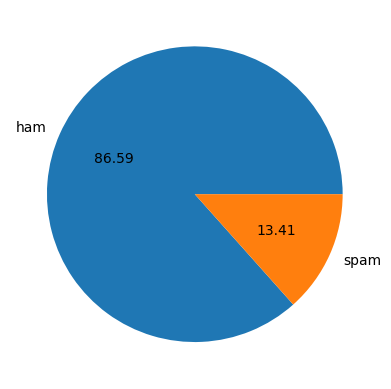

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['ham', 'spam'], autopct='%.2f')
plt.show()

In [17]:
import seaborn as sns

<Axes: xlabel='Num_characters', ylabel='Count'>

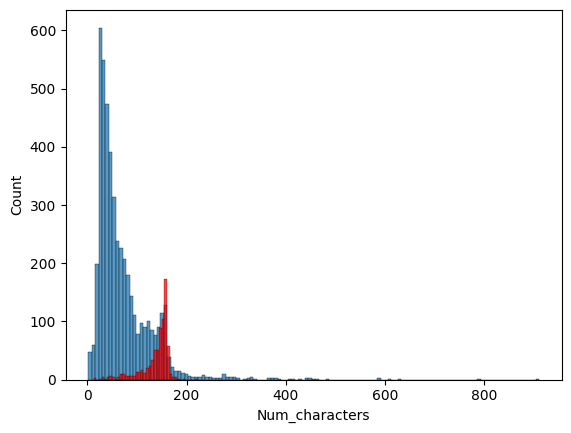

In [18]:
sns.histplot(df[df['Target']==0]['Num_characters'])
sns.histplot(df[df['Target']==1]['Num_characters'], color='red')

<Axes: xlabel='Num_words', ylabel='Count'>

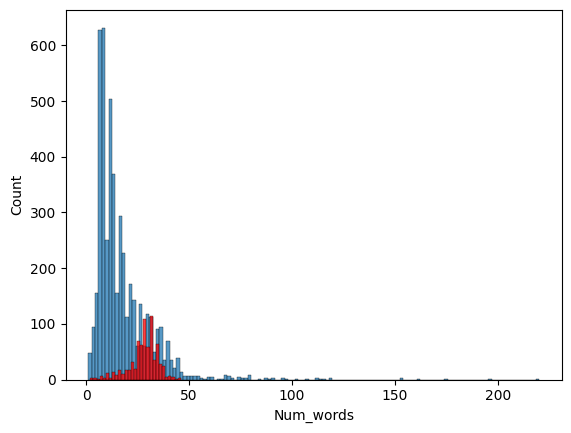

In [19]:
sns.histplot(df[df['Target']==0]['Num_words'])
sns.histplot(df[df['Target']==1]['Num_words'], color='red')

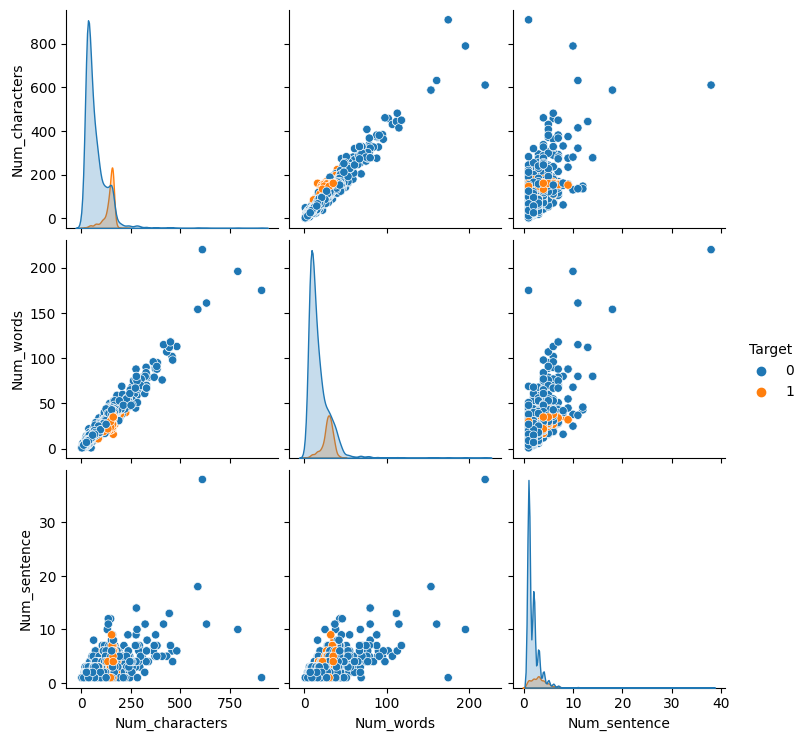

In [20]:
sns.pairplot(df, hue='Target')

_Here we can see that there are a few outliers for ham messages (higher character and word count) and these can be removed to make our model much better. But for now, we will use the data as it is and then see if any improvement is needed_

__DATA PREPROCESSING__
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming


In [16]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#ps.stem('word')
ps = PorterStemmer()
import string
string.punctuation
# stopwords.words('english')

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
def text_transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    new_text = []
    
    for i in text:
        alpha_num = i.isalnum()
        not_stopword = i not in stopwords.words('english')
        not_punctuation = i not in string.punctuation
        if np.array([alpha_num, not_stopword, not_punctuation]).all():
            new_text.append(ps.stem(i))
    return ' '.join(new_text)

In [18]:
df['Text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [19]:
text_transform(df['Text'][2000])

'b go 2 sch mon si need 2 take smth'

In [20]:
df['transformed_text'] = df['Text'].apply(text_transform)
df.head()

,Target,Text,Num_characters,Num_words,Num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [21]:
spam_corpus = []
for msg in df[df['Target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [22]:
print(spam_corpus)

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'click',

In [23]:
from collections import Counter
Counter(spam_corpus)

Counter({'free': 219,
         'entri': 26,
         '2': 174,
         'wkli': 14,
         'comp': 10,
         'win': 61,
         'fa': 4,
         'cup': 5,
         'final': 17,
         'tkt': 4,
         '21st': 2,
         'may': 7,
         'text': 139,
         '87121': 4,
         'receiv': 37,
         'question': 12,
         'std': 9,
         'txt': 169,
         'rate': 31,
         'c': 51,
         'appli': 29,
         '08452810075over18': 2,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 23,
         'week': 62,
         'word': 25,
         'back': 23,
         'like': 13,
         'fun': 9,
         'still': 7,
         'tb': 1,
         'ok': 5,
         'xxx': 11,
         'chg': 2,
         'send': 70,
         'rcv': 2,
         'winner': 16,
         'valu': 11,
         'network': 28,
         'custom': 51,
         'select': 31,
         'receivea': 2,
         'prize': 94,
         'reward': 10,
         'claim': 115,
       

In [24]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,365
1,free,219
2,2,174
3,txt,169
4,ur,144
5,u,141
6,text,139
7,mobil,135
8,4,120
9,claim,115


__MODEL BUILDING__
- The model that is most suited for text based data is the Naive-Bayes model (a common knowledge apparently in the field of Machine learning)
- But we will also try some other classification algorithms like random forests to see how they perform on this data

_we have the output ('Target') as numbers, but the input (i.e transformed_text) is still in text format. This needs conversion from text --> vectors (vectorization) so that it can be understood by the machine_
- bag of words
- TfIdf
- word to vec


In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [26]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [27]:
X.shape

(5572, 6708)

In [28]:
y = df['Target'].values

In [29]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [43]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score

-___We will be relying more on the precision score rather than the accuracy as the data is imbalanced (significantly more number of  ham compared to spam)___
-___That is why, the precision is a better indicator (along with the confusion matrix) of the performance of the model___

In [33]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [39]:
# gnb.fit(X_train, y_train)
# y_pred_gnb = gnb.predict(X_test)
# print(accuracy_score(y_test, y_pred_gnb))
# print(confusion_matrix(y_test, y_pred_gnb))
# print(precision_score(y_test, y_pred_gnb))

0.8690582959641255
[[844 113]
 [ 33 125]]
0.5252100840336135


In [40]:
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))
print(precision_score(y_test, y_pred_mnb))

0.957847533632287
[[957   0]
 [ 47 111]]
1.0


In [57]:
# bnb.fit(X_train, y_train)
# y_pred_bnb = bnb.predict(X_test)
# print(accuracy_score(y_test, y_pred_bnb))
# print(confusion_matrix(y_test, y_pred_bnb))
# print(precision_score(y_test, y_pred_bnb))

0.9695067264573991
[[956   1]
 [ 33 125]]
0.9920634920634921


In [35]:
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score

In [38]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Generate cross-validated predictions
cv_scores = cross_val_score(gnb, X_train, y_train, cv=kf, scoring='precision')

# Display cross-validation scores
print(f"Cross-Validation Precision Scores: {cv_scores}")
print(f"Mean Cross-Validation Precision: {np.mean(cv_scores):.4f}")
y_pred = cross_val_predict(gnb, X_train, y_train, cv=kf)

Cross-Validation Precision Scores: [0.55263158 0.53932584 0.48181818 0.5257732  0.54368932 0.5462963
 0.39583333 0.56565657 0.55238095 0.41414141]
Mean Cross-Validation Precision: 0.5118


In [39]:
print(len(y_pred))

4457


In [40]:
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print(precision_score(y_test, y_pred_gnb))

0.8690582959641255
[[844 113]
 [ 33 125]]
0.5252100840336135


__Key Points to Consider__
Cross-Validation is for Model Selection/Tuning, Not Training Improvement:

Cross-validation itself does not change how the final model is trained on X_train and y_train. Instead, it provides a better understanding of how the model performs across different data splits.
The purpose of cross-validation is to assess model generalization and help you choose hyperparameters or configurations, not to improve model performance by itself.
Once cross-validation is done, you still train the model on the entire X_train data before evaluating on X_test.
Same Test Set Results with and without Cross-Validation:

If your model's performance on X_test is the same with or without cross-validation, it suggests that the cross-validation process did not lead you to change the model's configuration (hyperparameters, model type, etc.).
This could indicate that the initial model configuration was already a good fit for the data and cross-validation didn’t reveal any overfitting or underfitting issues.
Possible Explanations for the Observed Behavior:

__No Hyperparameter Tuning:__ If you did not tune hyperparameters based on cross-validation results, the final model trained on X_train would be the same with or without cross-validation.
Well-Generalized Model: If the model generalizes well and there is no overfitting or underfitting, it might show consistent performance across different data splits during cross-validation and on the final test set (X_test).
Data Characteristics: If the data is simple, well-distributed, or does not have high variance, then cross-validation may not provide significantly different insights compared to training and evaluating the model on a single train-test split.
Stable Model Performance: Some models, such as decision trees or random forests, may perform consistently on a dataset if the data distribution across different splits is relatively homogeneous.
Possible Actions to Investigate Further
Check Cross-Validation Scores vs Test Set Scores:

__Compare the average cross-validation score with the test set score.__
If they are very close, it indicates that the model generalizes well and that there may not have been any need for further tuning.
If there is a significant gap, it suggests potential overfitting, and you might need to re-evaluate your model’s complexity.
Experiment with Hyperparameter Tuning:

__Cross-validation becomes more impactful when you use it for hyperparameter tuning.__ For example, you can use GridSearchCV or RandomizedSearchCV with cross-validation to find the best set of hyperparameters, and then fit the model with those optimized parameters.

__Example Summary Scenario__
Scenario: Assume you used a RandomForestClassifier with default parameters and tested its performance on X_test after splitting X_train and X_test.
With Cross-Validation: You perform cross-validation on X_train but do not perform hyperparameter tuning.
Result: The test performance is the same with or without cross-validation because the default model configuration was already providing optimal or near-optimal performance for your data.

__Conclusion__
Cross-validation helps you understand how well your model generalizes during training, but by itself, it does not modify how the final model is trained on X_train.
If you don't change the model configuration or hyperparameters based on cross-validation, the final model (trained on X_train) will perform the same on X_test as if cross-validation wasn’t used.
For cross-validation to have more impact, consider using it for hyperparameter tuning, model selection, and checking for potential overfitting or underfitting issues.

In [1]:
''' 
example for hyperparameter tuning using grid search

from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")

# Use the best model for training
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

'''

' \nexample for hyperparameter tuning using grid search\n\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {\'n_estimators\': [50, 100, 150], \'max_depth\': [None, 10, 20]}\ngrid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)\ngrid_search.fit(X_train, y_train)\nprint(f"Best parameters: {grid_search.best_params_}")\n\n# Use the best model for training\nbest_model = grid_search.best_estimator_\nbest_model.fit(X_train, y_train)\ny_pred = best_model.predict(X_test)\n\n'

In [49]:
fold_f1 = []

for train_index, test_index in kf.split(X_train):
#     print(train_index)
#     print(test_index)
#     print(y_train)
#     print(y_train[np.array(test_index)])
    # Split data into training and testing sets for this fold
    X_train_new, X_test_new = X_train[train_index], X_train[test_index]
    y_train_new, y_test_new = y_train[train_index], y_train[test_index]
    
    
    mnb.fit(X_train_new, y_train_new)
    y_pred_mnb_fold = mnb.predict(X_test_new)

    # Evaluate accuracy
    f1 = f1_score(y_test_new, y_pred_mnb_fold)
    fold_f1.append(f1)
    print(f"f1: {f1:.2f}")

f1: 0.85
f1: 0.78
f1: 0.83
f1: 0.88
f1: 0.84
f1: 0.86
f1: 0.87
f1: 0.84
f1: 0.84
f1: 0.80


In [50]:
print(np.mean(fold_f1))

0.8398102009663765


___Multinomial Naive Bayes___  
Using the CV techique to tune the hyperparameters

In [55]:
from sklearn.model_selection import GridSearchCV
kf = KFold(n_splits=10, shuffle=True, random_state=42)

param_grid = {'alpha': np.arange(0.1,1,0.1)}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=kf)
grid_search.fit(X_train, y_train)
print(f"Best parameters: ", grid_search.best_params_)

Best parameters:  {'alpha': 0.2}


In [58]:
mnb = MultinomialNB(alpha=0.2)
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print('accuracy: ', accuracy_score(y_test, y_pred_mnb))
print('confusion matrix: ',confusion_matrix(y_test, y_pred_mnb))
print('precision: ', precision_score(y_test, y_pred_mnb))
print('f1: ', f1_score(y_test, y_pred_mnb))

accuracy:  0.9739910313901345
confusion matrix:  [[952   5]
 [ 24 134]]
precision:  0.9640287769784173
f1:  0.9023569023569024
